In [1]:
import sys
sys.path.extend(['/home/nate/Code/spectroseti'])
sys.path.extend(['/home/nate/Code/spectroseti/spectroseti'])
import spectroseti.runner as runner
import spectroseti.apf as apf
import matplotlib.pyplot as plt
import spectroseti.utilities as util

Here I'll show the basic run on one spectral order

In [2]:
red = apf.APFRedObs('baa',230)

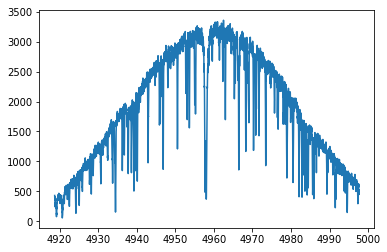

In [3]:
plt.plot(red.wavs[30,:],red.counts[30,:-1])

That fat absoption is O[III]

We will now "deblaze" the spectrum with a two-phase smoothing algorithhm that uses a median smooth and a "Savitzky-Golay" filter to remove high-frequency and low-frequency noise, respectively.

In [5]:
red.deblaze_orders(method='savitzky')

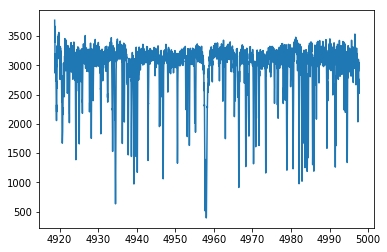

In [6]:
plt.plot(red.wavs[30,:],red.counts[30,:-1])

Looks better yeah? Now we run a second deblazing that should make the continuum even flatter

This one takes a bit of time. This could be sped up with some parallelization

In [9]:
red.deblaze_orders(method='meanshift')

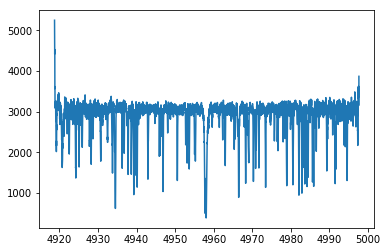

In [10]:
plt.plot(red.wavs[30,:],red.counts[30,:-1])

Cool. Very flat continuum. Now we can treat the continuum brightness as a single value, and look for consecutive pixels that exceed this value.

running "percentile" below is time consuming as it performs another meanshift operation.

In [11]:
ord = red.counts[30,:-1]
percentile = util.getpercentile(ord,75)
thresh = util.findthresh(ord - percentile)

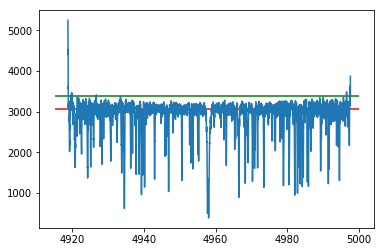

In [12]:
plt.plot(red.wavs[30,:],red.counts[30,:-1])
plt.hlines(percentile,4915,5000, colors='r')
plt.hlines(percentile+5*thresh,4915,5000, colors='g')
